In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('datasets/WineQT.csv')

In [65]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [66]:
df = df.drop(columns=['Id'])

In [67]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
df = df.drop(columns=['quality'])

In [68]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_binary
117,6.8,0.64,0.10,2.1,0.085,18.0,101.0,0.99560,3.34,0.52,10.2,0
711,7.5,0.71,0.00,1.6,0.092,22.0,31.0,0.99635,3.38,0.58,10.0,1
224,9.0,0.46,0.31,2.8,0.093,19.0,98.0,0.99815,3.32,0.63,9.5,1
625,9.0,0.80,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,1
873,7.1,0.75,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,1


# Train test split
## first split dataset into x(input) and y(output)

In [70]:
x=df.drop(columns=['quality_binary'])
y=df['quality_binary']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Scaling by Normalization (Robust scaling)
### NOTE apply sklearn scaler function  on x_train to fit only and
### apply transform in both x_train and x_test.However,we donot appply scalar function in y(expect in regression with wide range of value)

In [72]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(x_train)
x_train_scaled =scaler.transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [73]:
x_train_scaled= pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [74]:
np.round(x_train_scaled.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0,914.0
mean,0.2,0.0,0.0,0.5,0.4,0.2,0.2,0.0,0.0,0.2,0.1
std,0.9,0.7,0.6,1.9,2.4,0.7,0.8,0.8,0.8,1.0,0.6
min,-1.7,-1.7,-0.8,-1.9,-3.3,-0.9,-0.8,-2.9,-3.0,-1.7,-1.1
25%,-0.4,-0.5,-0.5,-0.4,-0.4,-0.4,-0.4,-0.5,-0.5,-0.4,-0.4
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.6,0.5,0.5,0.6,0.6,0.6,0.6,0.5,0.5,0.6,0.6
max,4.1,4.4,2.3,19.0,26.7,3.9,5.9,2.9,3.7,8.1,2.2


In [75]:
x_train_scaled.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
516,0.473684,-0.791667,0.484848,5.285714,-0.25,-0.428571,-0.609756,-0.028509,-0.052632,0.000000,1.117647
41,-0.052632,0.000000,0.000000,-0.428571,0.15,0.071429,0.000000,0.769737,0.631579,0.176471,-0.705882
331,2.894737,-1.041667,1.121212,0.571429,0.20,-0.500000,-0.414634,1.559211,-0.789474,0.294118,-0.294118
846,1.315789,-1.166667,0.727273,-0.571429,-0.15,-0.500000,-0.439024,0.462719,-0.684211,2.588235,0.470588
838,-0.421053,-1.250000,0.727273,-0.571429,-1.95,-0.357143,-0.487805,-1.405702,0.421053,-0.352941,1.294118


# Effect of Scaling

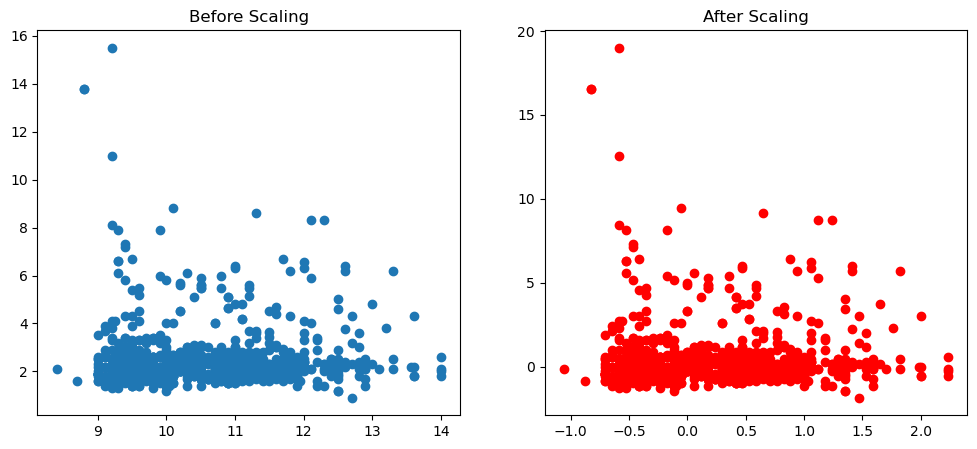

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['alcohol'], x_train['residual sugar'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['residual sugar'],color='red')
ax2.set_title("After Scaling")
plt.show()

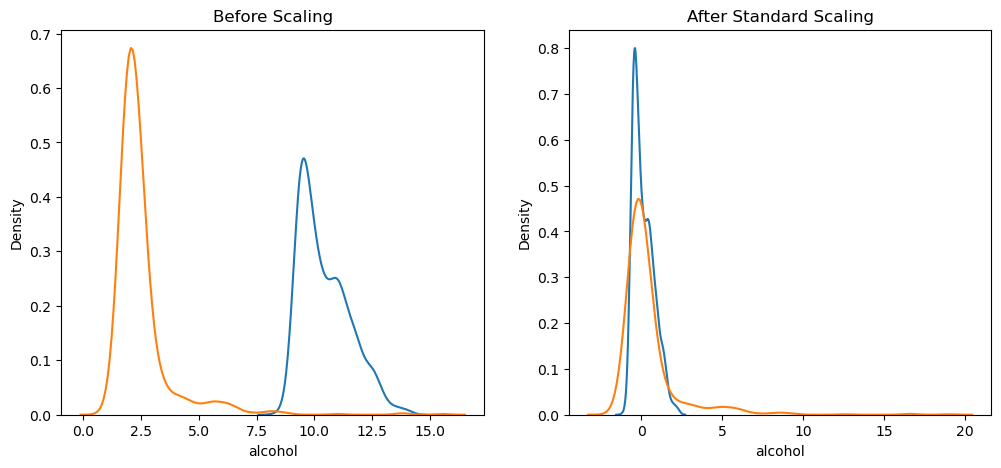

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['residual sugar'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
plt.show()

# Comparison of Distributions

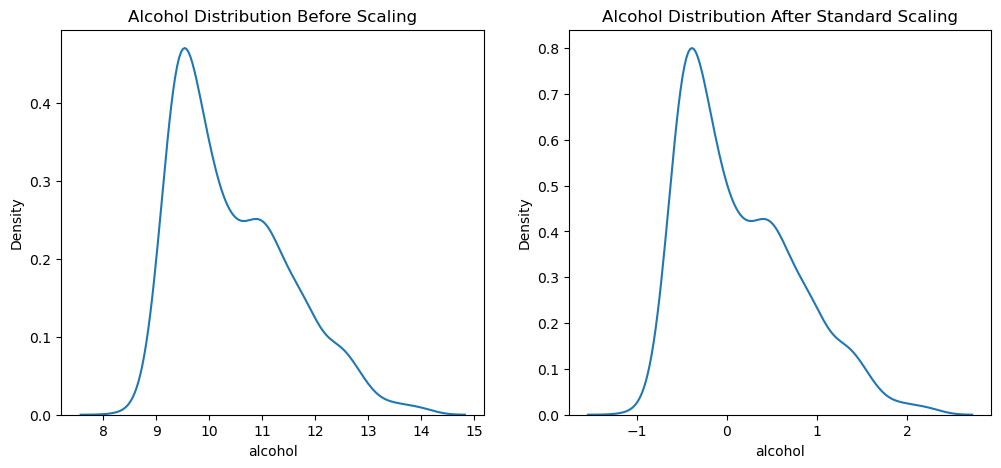

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
plt.show()

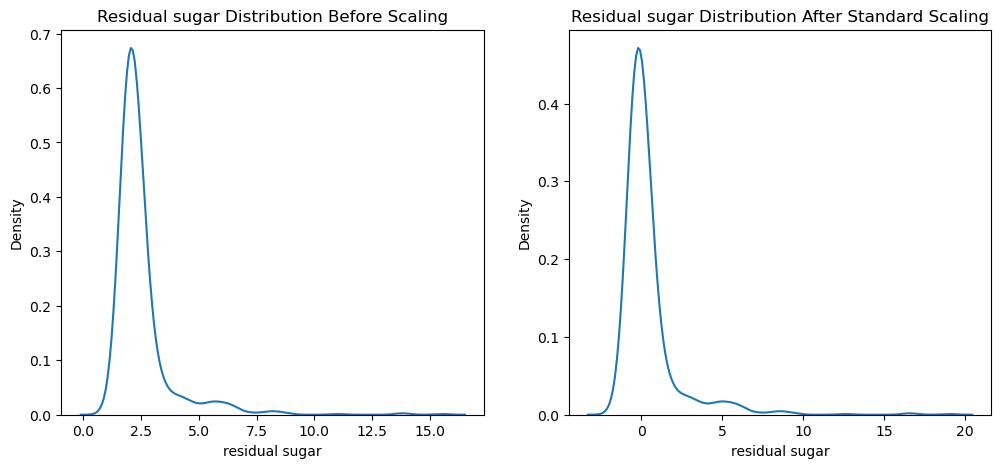

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Residual sugar Distribution Before Scaling')
sns.kdeplot(x_train['residual sugar'], ax=ax1)

# after scaling
ax2.set_title('Residual sugar Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['residual sugar'], ax=ax2)
plt.show()

# Why scaling is important?

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
log_reg = LogisticRegression()
log_reg_scaled = LogisticRegression()

In [85]:
log_reg.fit(x_train,y_train)

C:\Users\Roshan848\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
log_reg_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [87]:
y_pred = log_reg.predict(x_test)
y_pred_scaled = log_reg_scaled.predict(x_test_scaled)

# Check accuracy before and after scaling

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.7554585152838428
Scaled 0.7641921397379913
